# Introducción a la Ciencia de Datos: Tarea 1

Este notebook contiene el código de base para realizar la Tarea 1 del curso. Puede copiarlo en su propio repositorio y trabajar sobre el mismo.
Las **instrucciones para ejecutar el notebook** están en la [página inicial del repositorio](https://gitlab.fing.edu.uy/maestria-cdaa/intro-cd).

Se utiliza el lenguaje Python y la librería Pandas. Si no tiene ninguna familiaridad con la librería, se recomienda realizar algún tutorial introductorio (ver debajo).
También se espera que los alumnos sean proactivos a la hora de consultar las documentaciones de las librerías y del lenguaje, para entender el código provisto.
Además de los recursos provistos en la [página del curso](https://eva.fing.edu.uy/course/view.php?id=1378&section=1), los siguientes recursos le pueden resultar interesantes:
 - [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) y [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html): Son parte de la documentación en la página oficial de Pandas.
 - [Kaggle Learn](https://www.kaggle.com/learn): Incluye tutoriales de Python y Pandas.


Si desea utilizar el lenguaje R y está dispuesto a no utilizar (o traducir) este código de base, también puede hacerlo.

En cualquier caso, **se espera que no sea necesario revisar el código para corregir la tarea**, ya que todos los resultados y análisis relevantes deberían estar en el **informe en formato PDF**.

## Cargar bibliotecas (dependencias)
Recuerde instalar los requerimientos (`requirements.txt`) en el mismo entorno donde está ejecutando este notebook (ver [README](https://github.com/DonBraulio/introCD)).

In [2]:
from time import time
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Agregue aqui el resto de las librerias que necesite
# from ...
# import ...

## Lectura de Datos

In [6]:
# DataFrame con todos los discursos:
df_speeches = pd.read_csv('./us_2020_election_speeches.csv')
df_speeches

,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\r\nHow great is it to be...,"Oct 16, 2020","Macon, Georgia",Campaign Speech
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall
...,...,...,...,...,...,...
264,Bernie Sanders,Bernie Sanders Speech Transcript: Sanders Spea...,Bernie Sanders: (00:00)\r\nJust want to take t...,"Feb 6, 2020",Iowa,Campaign Speech
265,Democratic Candidates,Transcript: Speeches at the Iowa Caucuses – Be...,Bernie Sanders: (00:08)\r\nThank you. Thank yo...,"Feb 4, 2020",Iowa,Campaign Speech
266,Donald Trump,Donal Trump Iowa Rally Transcript: Trump Holds...,Donald Trump: (00:24)\r\nI worked so hard for ...,"Jan 30, 2020","Des Moines, Iowa",Campaign Speech
267,Donald Trump,Donald Trump New Jersey Rally Speech Transcrip...,Donald Trump: (01:22)\r\nThank you. Thank you....,"Jan 28, 2020","Wildwood, New Jersey",Campaign Speech


# Parte 1: Cargado y Limpieza de Datos

## Exploración de Datos

In [14]:

# Parte 1.A - Revisión inicial de los datos

# Mostrar estructura general del DataFrame
print("Información general del DataFrame:")
print(df_speeches.info())
print("--------------------------------------------------")
# Mostrar primeros registros
print("\nPrimeras filas del DataFrame:")
display(df_speeches.head())
print("--------------------------------------------------")
# Verificar valores nulos
print("\nConteo de valores nulos por columna:")
print(df_speeches.isnull().sum())
print("--------------------------------------------------")
# TODO: Analice la cantidad de discursos por candidato

# Conteo de discursos por candidato/a
print("\nCantidad de discursos por orador/a:")
speech_counts = df_speeches['speaker'].value_counts()
print(speech_counts)
print("--------------------------------------------------")
# Tome los 5 candidatos con más discursos
# Selección de top 5 candidatos/as con más discursos
top_5_speakers = speech_counts.head(5).index.tolist()
print("\nTop 5 candidatos/as con más discursos:")
print(top_5_speakers)
print("--------------------------------------------------")
# Quedarse con los 5 con más discursos

# Filtrar el DataFrame para trabajar solo con ellos/as
df_speeches_top_5 = df_speeches[df_speeches['speaker'].isin(top_5_speakers)]
print(f"\nDataFrame filtrado contiene {df_speeches_top_5.shape[0]} discursos.")
display(df_speeches_top_5.head())
print("--------------------------------------------------")
print("Información general del DataFrame nuevo:")
print(df_speeches_top_5.info())

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   speaker   266 non-null    object
 1   title     269 non-null    object
 2   text      269 non-null    object
 3   date      269 non-null    object
 4   location  251 non-null    object
 5   type      248 non-null    object
dtypes: object(6)
memory usage: 12.7+ KB
None
--------------------------------------------------

Primeras filas del DataFrame:


,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\r\nHow great is it to be...,"Oct 16, 2020","Macon, Georgia",Campaign Speech
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall


--------------------------------------------------

Conteo de valores nulos por columna:
speaker      3
title        0
text         0
date         0
location    18
type        21
dtype: int64
--------------------------------------------------

Cantidad de discursos por orador/a:
speaker
Joe Biden                                 71
Donald Trump                              53
Mike Pence                                19
Bernie Sanders                            16
Kamala Harris                             11
                                          ..
Joe Biden, Al Gore                         1
Joe Biden, Bernie Sanders                  1
Tulsi Gabbard                              1
Donna Brazile                              1
Pete Buttigieg,Amy Klobuchar, O’Rourke     1
Name: count, Length: 71, dtype: int64
--------------------------------------------------

Top 5 candidatos/as con más discursos:
['Joe Biden', 'Donald Trump', 'Mike Pence', 'Bernie Sanders', 'Kamala Harris']
---------

,speaker,title,text,date,location,type
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall
5,Donald Trump,"Donald Trump Campaign Rally Greenville, NC Tra...",Donald Trump: (01:25)\r\nThank you very much. ...,"Oct 15, 2020","Greenville, North Carolina",Campaign Speech


--------------------------------------------------
Información general del DataFrame nuevo:
<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 1 to 267
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   speaker   170 non-null    object
 1   title     170 non-null    object
 2   text      170 non-null    object
 3   date      170 non-null    object
 4   location  163 non-null    object
 5   type      155 non-null    object
dtypes: object(6)
memory usage: 9.3+ KB
None


## Visualizaciones

C:\Users\juanp\AppData\Local\Temp\ipykernel_27980\599131783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['date'] = pd.to_datetime(df_speeches_top_5['date'])
C:\Users\juanp\AppData\Local\Temp\ipykernel_27980\599131783.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['week'] = df_speeches_top_5['date'].dt.to_period('W').dt.start_time


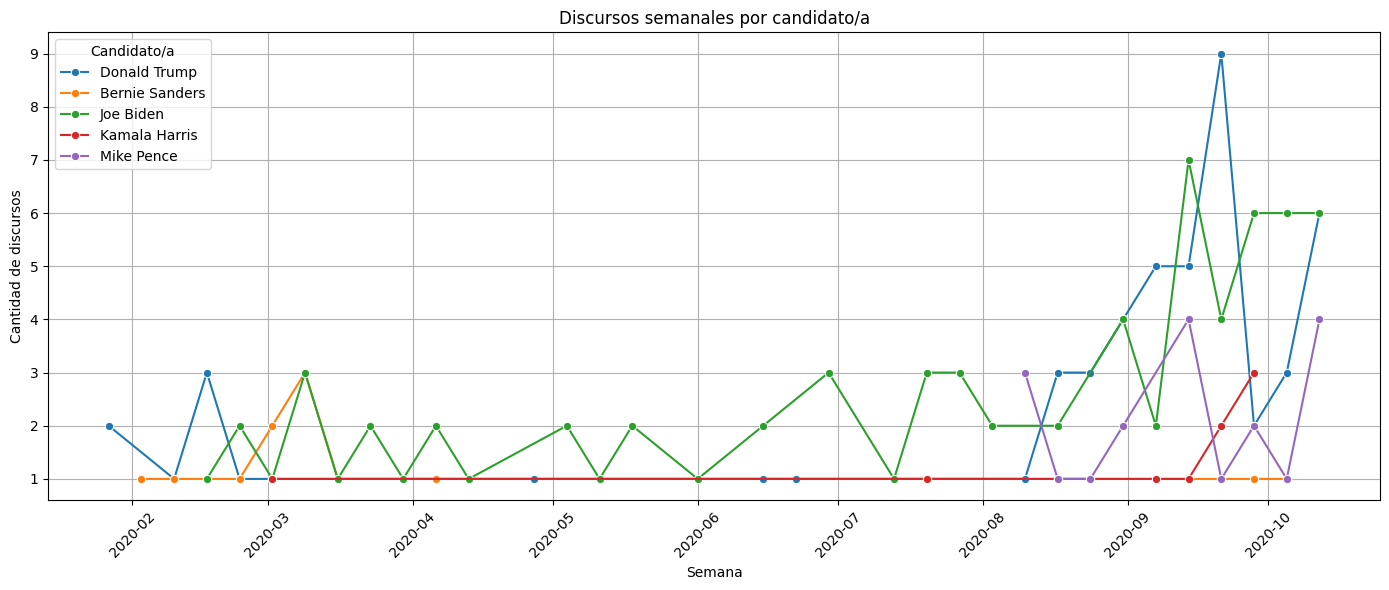

In [19]:
# TODO: Visualización de los discursos de cada candidato a lo largo del tiempo 
#me aseguro que date es datetime
df_speeches_top_5['date'] = pd.to_datetime(df_speeches_top_5['date'])

# Agrupar por semana 
df_speeches_top_5['week'] = df_speeches_top_5['date'].dt.to_period('W').dt.start_time

# Agrupamos por semana y candidato
weekly_grouped = df_speeches_top_5.groupby(['week', 'speaker']).size().reset_index(name='speech_count')

# Graficar
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_grouped, x='week', y='speech_count', hue='speaker', marker='o')

plt.title('Discursos semanales por candidato/a')
plt.xlabel('Semana')
plt.ylabel('Cantidad de discursos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title='Candidato/a')
plt.show()



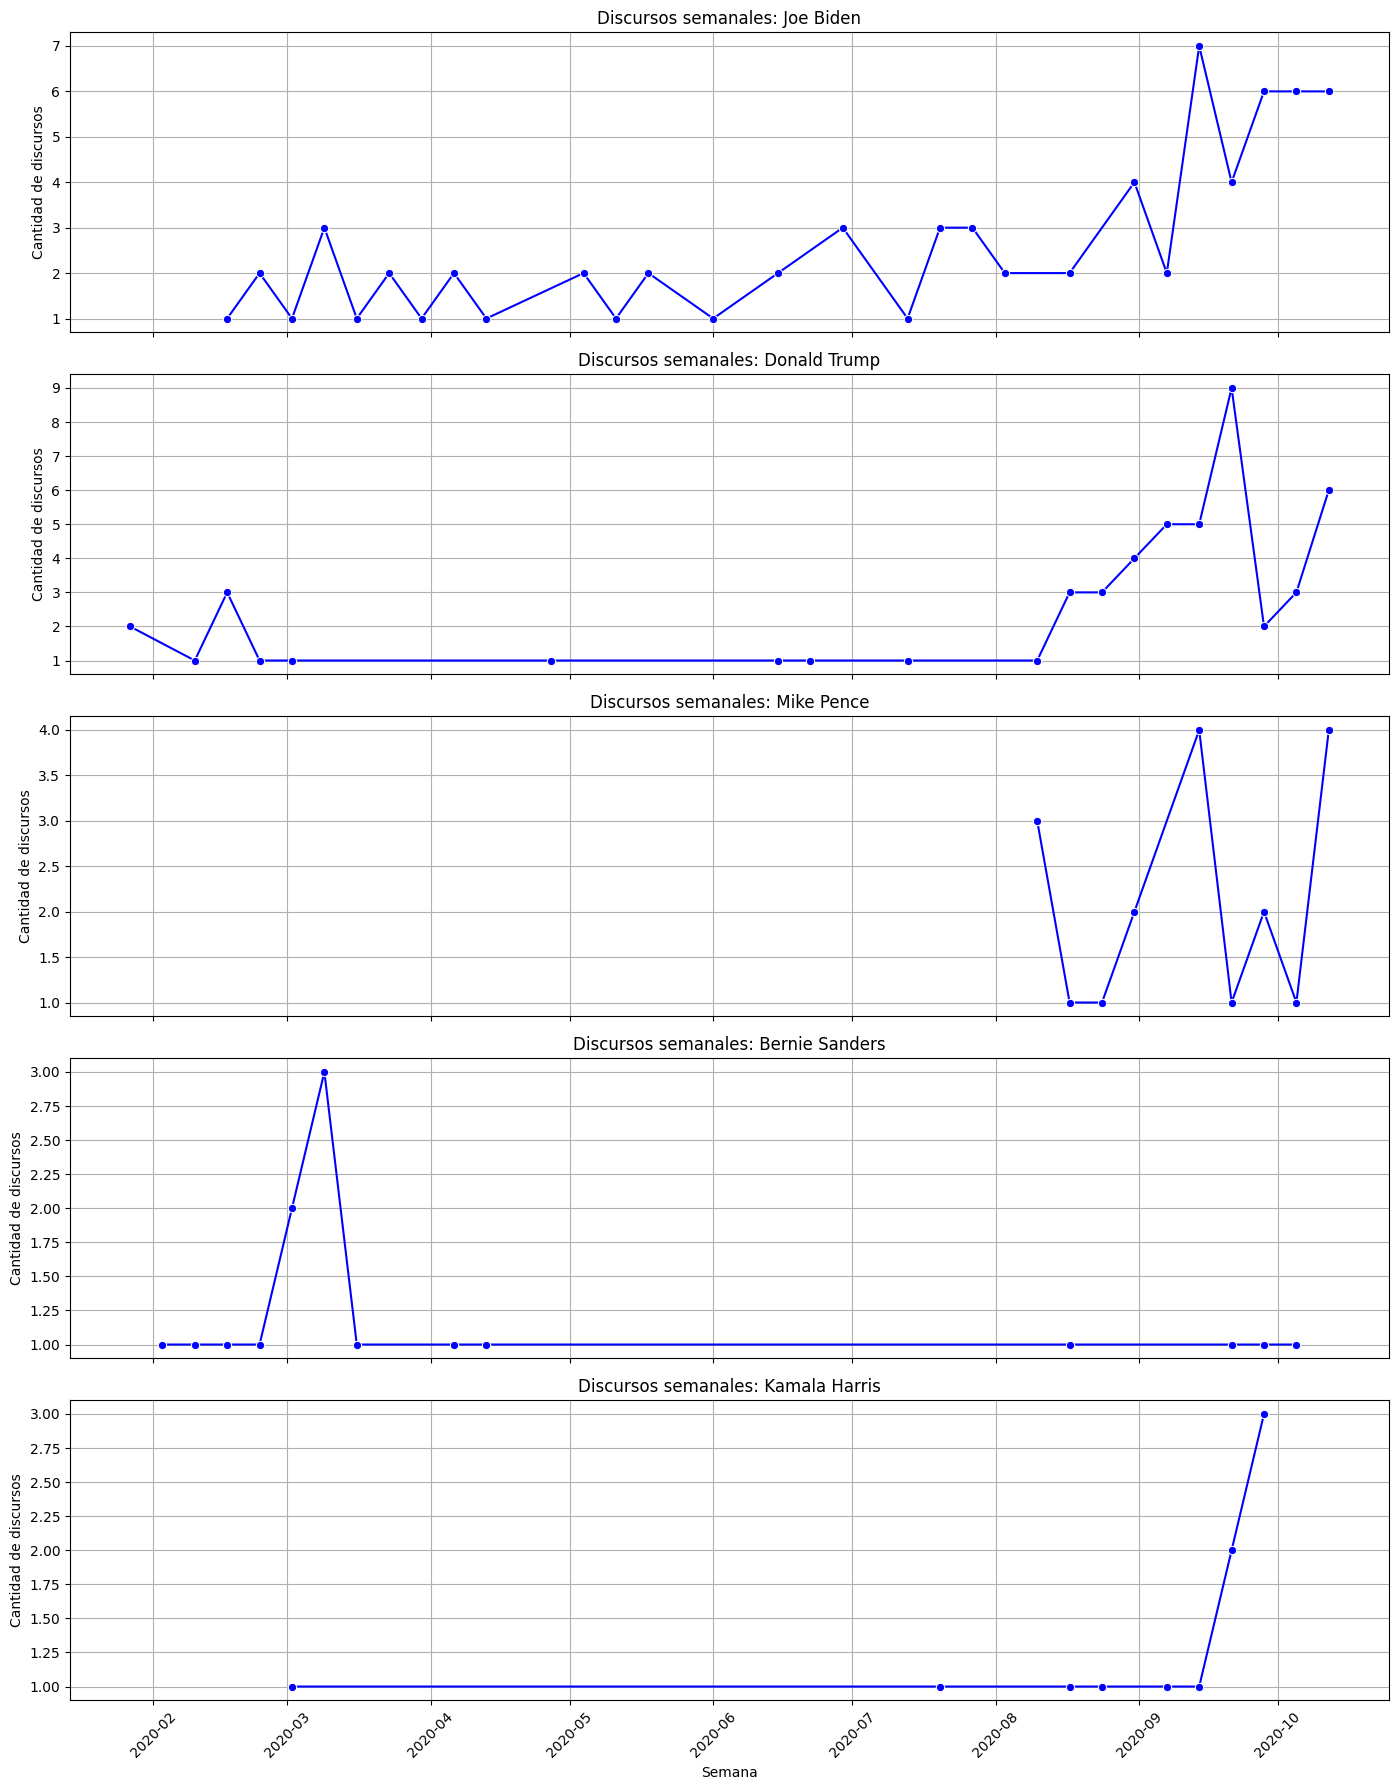

In [17]:
#Ubicar mejor temporalmente como se pasaron cada uno

# Crear una figura con 5 subgráficas (una para cada candidato)
fig, axes = plt.subplots(5, 1, figsize=(14, 18), sharex=True)

# Listar los 5 candidatos
candidates = df_speeches_top_5['speaker'].unique()

# Iterar sobre los candidatos y graficar en cada subgráfica
for i, candidate in enumerate(candidates):
    ax = axes[i]
    
    # Filtrar los datos para el candidato actual
    candidate_data = weekly_grouped[weekly_grouped['speaker'] == candidate]
    
    # Graficar los discursos por semana
    sns.lineplot(data=candidate_data, x='week', y='speech_count', ax=ax, marker='o', color='blue')
    
    # Añadir título y etiquetas
    ax.set_title(f'Discursos semanales: {candidate}')
    ax.set_xlabel('Semana')
    ax.set_ylabel('Cantidad de discursos')
    ax.grid(True)
    
# Ajustar diseño
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Limpieza de Texto y Conteo de Palabras

In [20]:
def clean_text(df, column_name):
    # Eliminar el encabezado inicial hasta el primer salto de línea
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)
    
    # Convertir a minúsculas
    result = result.str.lower()
    
    # Reemplazar signos de puntuación comunes por espacios
    punctuation = ["[", "\n", ",", ":", "?", ".", "!", ";", "(", ")", "\"", "'"]
    for punc in punctuation:
        result = result.str.replace(punc, " ", regex=False)
    
    # Reemplazar múltiples espacios por uno solo
    result = result.str.replace(r'\s+', ' ', regex=True)
    
    # Eliminar espacios al inicio y al final
    result = result.str.strip()
    
    return result


# TODO: Creamos una nueva columna CleanText a partir de text
# df_speeches_top_5["CleanText"] = 
# Aplicar la limpieza al DataFrame
df_speeches_top_5["CleanText"] = clean_text(df_speeches_top_5, "text")

# Verificamos que el texto ha sido limpiado correctamente
df_speeches_top_5[["text", "CleanText"]].head()

#  Se normalizó el texto convirtiéndolo a minúsculas,
#  eliminando signos de puntuación( se agregaron signos de puntuación faltantes),
#  espacios extra y bordes



C:\Users\juanp\AppData\Local\Temp\ipykernel_27980\370280607.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5["CleanText"] = clean_text(df_speeches_top_5, "text")


,text,CleanText
1,"Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...",hello michigan hi how are you what’s your name...
2,President Trump: (00:30)\r\nThank you. What a ...,thank you what a nice group thank you very muc...
3,"George Stephanopoulos: (00:41)\r\nHey, and wel...",hey and welcome to our town hall with joe bide...
4,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,it’s nothing but noise what okay all right lad...
5,Donald Trump: (01:25)\r\nThank you very much. ...,thank you very much thank you let’s see it’s 1...


In [21]:
# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_speeches_top_5["WordList"] = df_speeches_top_5["CleanText"].str.split()

# Veamos la nueva columna creada: notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_speeches_top_5[["CleanText", "WordList"]]

C:\Users\juanp\AppData\Local\Temp\ipykernel_27980\4032719035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5["WordList"] = df_speeches_top_5["CleanText"].str.split()


,CleanText,WordList
1,hello michigan hi how are you what’s your name...,"[hello, michigan, hi, how, are, you, what’s, y..."
2,thank you what a nice group thank you very muc...,"[thank, you, what, a, nice, group, thank, you,..."
3,hey and welcome to our town hall with joe bide...,"[hey, and, welcome, to, our, town, hall, with,..."
4,it’s nothing but noise what okay all right lad...,"[it’s, nothing, but, noise, what, okay, all, r..."
5,thank you very much thank you let’s see it’s 1...,"[thank, you, very, much, thank, you, let’s, se..."
...,...,...
257,hello manchester and i am thrilled to be in th...,"[hello, manchester, and, i, am, thrilled, to, ..."
260,thank you thank you all for coming out let me ...,"[thank, you, thank, you, all, for, coming, out..."
264,just want to take this opportunity to thank al...,"[just, want, to, take, this, opportunity, to, ..."
266,i worked so hard for this state i worked so ha...,"[i, worked, so, hard, for, this, state, i, wor..."


# Parte 2: Conteo de Palabras y Visualizaciones

 ## Candidatos con mayor cantidad de palabras

C:\Users\juanp\AppData\Local\Temp\ipykernel_27980\401977705.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_words_per_speaker = word_counts.groupby('speaker').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)
C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalC

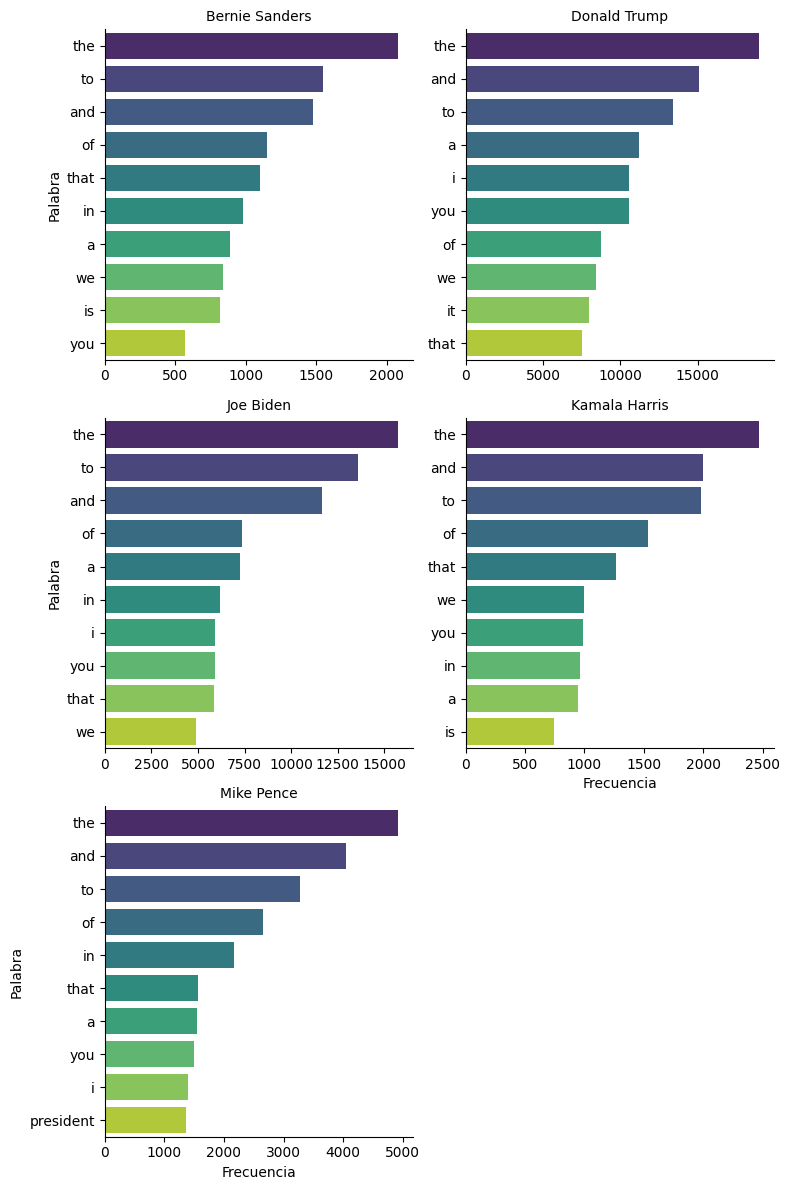

In [22]:
# TODO: Realice una visualización que permita comparar las palabras más frecuentes de cada uno de los cinco candidatos/as. 
# - Encuentra algún problema en los resultados?

# Expandir la lista de palabras a filas
df_words = df_speeches_top_5.explode('WordList')

# Agrupar por candidato y palabra, y contar
word_counts = df_words.groupby(['speaker', 'WordList']).size().reset_index(name='count')

# Para cada candidato, seleccionamos las 10 palabras más frecuentes
top_words_per_speaker = word_counts.groupby('speaker').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Gráfica
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(top_words_per_speaker, col='speaker', col_wrap=2, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.barplot, x='count', y='WordList', palette="viridis", orient='h')

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Frecuencia", "Palabra")
g.tight_layout()
plt.show()

Vemos que las palabras mas comunes son en general son 
"the, to, and, of, that, in, a we, is, you"
"the, and, to, a, I, you, of, we, it, that"
"the, to, and, of, a, in, I, you, that, we"
"the, and, to, of, that, we, you, in, a, is"
"the, and, to, of, in, that, a, you, I, president"

En total se dicen 12-13 palabras distintas. que a primera vista no parecen representativas de los enfoques de los discursos.

Lo que se podria hacer es sacar las stopwords por ejemplo, o los verbos que son muy comunes y que no dicen nada. Usar lemarizacion para no perder el significado entre palabras parecidas con el mismo significado y comparar a todos los candidatos con la misma cantidad de discursos, ya que es dispar

In [23]:
# TODO: Busque los candidatos/as con mayor cantidad de palabras.
# Primero, creamos una nueva columna con la cantidad de palabras por discurso
df_speeches_top_5['word_count'] = df_speeches_top_5['WordList'].apply(len)

# Ahora agrupamos por candidato y sumamos la cantidad total de palabras
total_words_per_speaker = df_speeches_top_5.groupby('speaker')['word_count'].sum().reset_index()

# Ordenamos de mayor a menor
total_words_per_speaker = total_words_per_speaker.sort_values(by='word_count', ascending=False)

# Mostramos el resultado
print(total_words_per_speaker)

          speaker  word_count
1    Donald Trump      536266
2       Joe Biden      379568
4      Mike Pence      102853
3   Kamala Harris       57944
0  Bernie Sanders       47307


C:\Users\juanp\AppData\Local\Temp\ipykernel_27980\806275159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['word_count'] = df_speeches_top_5['WordList'].apply(len)


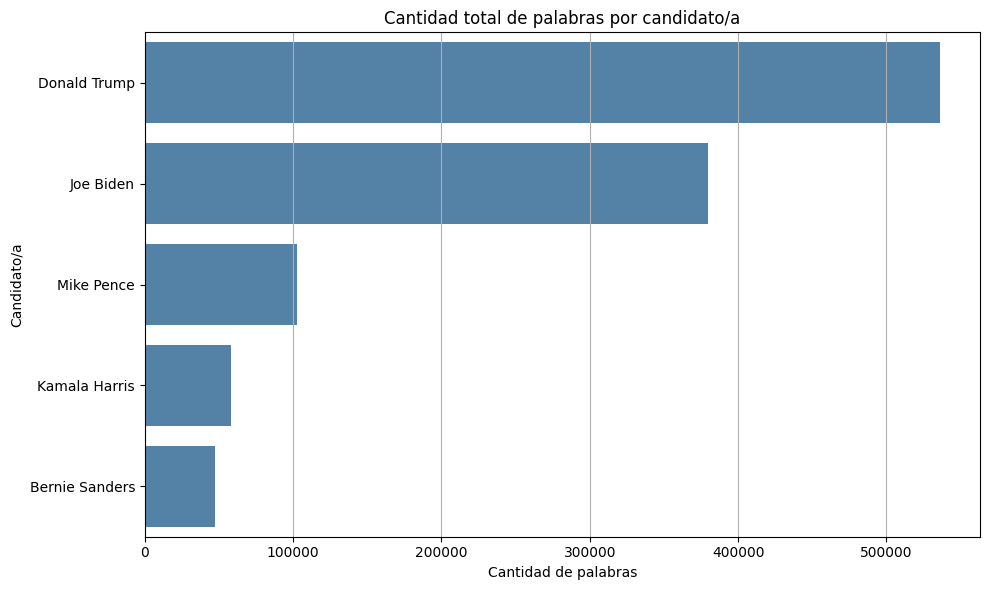

In [24]:
# Gráfica
plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_words_per_speaker,
    x='word_count',
    y='speaker',
    color='steelblue'  # Un solo color
)

plt.title('Cantidad total de palabras por candidato/a')
plt.xlabel('Cantidad de palabras')
plt.ylabel('Candidato/a')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
# TODO: Construya una matriz de 5x5, donde cada fila y columna corresponden a un candiato/a, 
# y la entrada (i,j) contiene la cantidad de veces que el candiato/a “i” menciona al candiato/a “j”.

# mentions_matrix = ...

# Opcional: Genere un grafo dirigido con esa matriz de adyacencia para visualizar las menciones. 
# Puede ser util la biblioteca networkx

In [27]:
candidates = df_speeches_top_5['speaker'].unique()

# Inicializamos matriz vacía
mentions_matrix = pd.DataFrame(0, index=candidates, columns=candidates)

# Buscamos menciones
for _, row in df_speeches_top_5.iterrows():
    speaker = row['speaker']
    text = row['CleanText'].lower()
    
    for candidate in candidates:
        if candidate.lower() in text:
            mentions_matrix.loc[speaker, candidate] += 1

mentions_matrix

,Joe Biden,Donald Trump,Mike Pence,Bernie Sanders,Kamala Harris
Joe Biden,71,53,1,5,12
Donald Trump,44,51,24,30,8
Mike Pence,19,19,19,5,8
Bernie Sanders,10,12,0,16,1
Kamala Harris,11,9,0,0,10


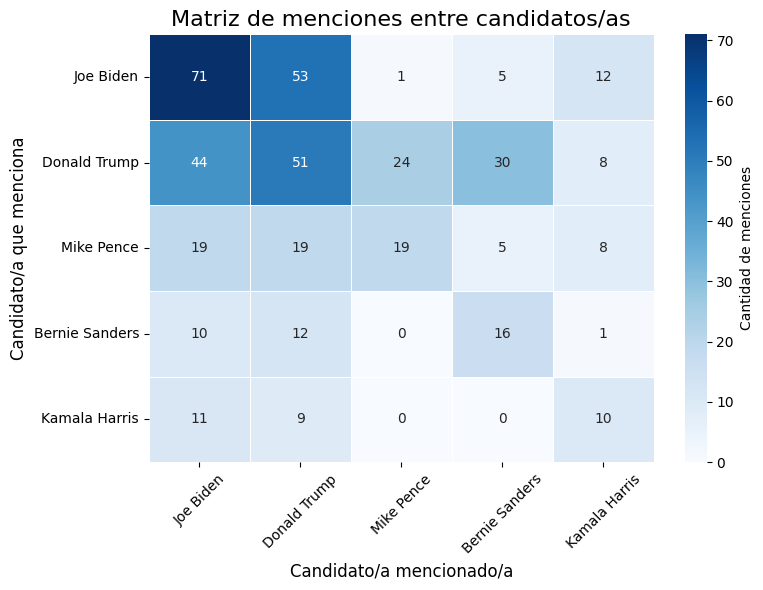

In [29]:
plt.figure(figsize=(8, 6))

# Crear heatmap
sns.heatmap(
    mentions_matrix,
    annot=True,            # Mostrar los números
    fmt='d',                # Formato entero
    cmap='Blues',           # Mapa de colores (más oscuro = más menciones)
    linewidths=0.5,         # Líneas entre celdas
    cbar_kws={'label': 'Cantidad de menciones'}  # Barra de color
)

# Títulos y etiquetas
plt.title('Matriz de menciones entre candidatos/as', fontsize=16)
plt.xlabel('Candidato/a mencionado/a', fontsize=12)
plt.ylabel('Candidato/a que menciona', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

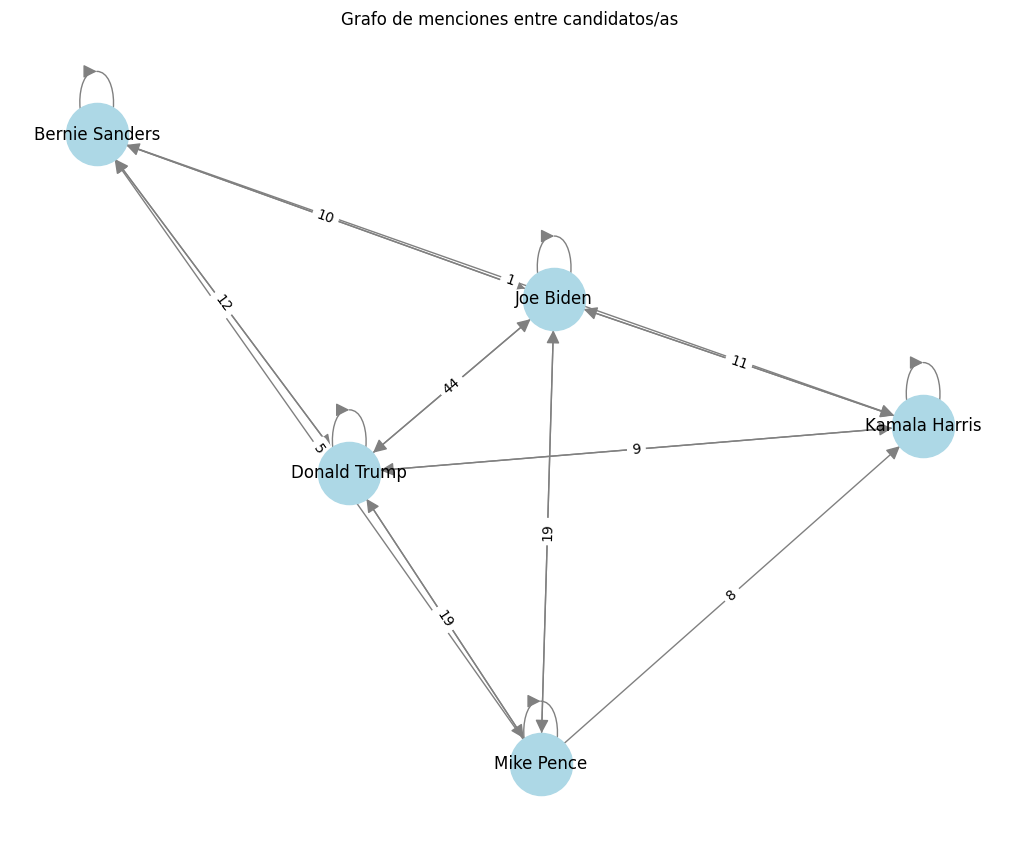

In [28]:
G = nx.from_pandas_adjacency(mentions_matrix, create_using=nx.DiGraph())

# Dibujar grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # layout de nodos

nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2000,
    font_size=12,
    arrowsize=20,
    edge_color='gray'
)

# Añadir etiquetas de peso en las aristas
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Grafo de menciones entre candidatos/as')
plt.show()

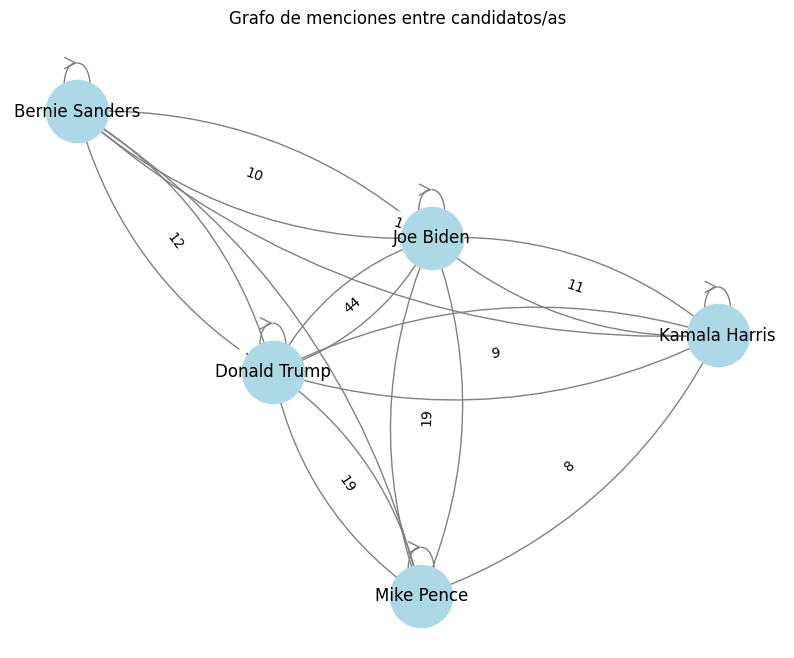

In [34]:
G = nx.from_pandas_adjacency(mentions_matrix, create_using=nx.DiGraph())

# Dibujar grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # layout de nodos

# Dibujar nodos y etiquetas
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=12)

# Dibujar aristas con curvatura
nx.draw_networkx_edges(
    G, pos,
    arrowstyle='->',
    arrowsize=20,
    edge_color='gray',
    connectionstyle='arc3, rad=0.2'  # <- Acá agregamos la curvatura
)

# Añadir etiquetas de peso en las aristas
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title('Grafo de menciones entre candidatos/as')
plt.axis('off')
plt.show()
